<div class="exo"> <b>Exercise 4.3.1:</b> Clustering for color compression in images. <br/><br/>


Take a black and white image with 256 gray levels, the (1D) vector of its pixel values can be obtained with the <tt>flatten</tt> method of NumPy. 


<ul><li>The goal of this exercise is to use clustering to convert the 255 greyscale values of the pixels to 8 values. To do so, cluster the pixels into 8 clusters and replace the pixels values with their cluster centroids.</li>
<li>Compare with an <i>uniform</i> quantizer. </li> 
</ul>

</div>

(480, 640)


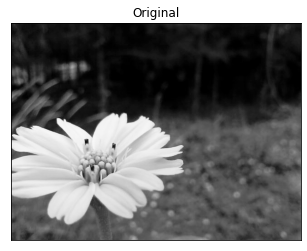

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

#### IMAGE
img = mpimg.imread('img/flower.png')
img_gray =  0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2] # Apparently these are "good" coefficients to convert to grayscale
####

print(img_gray.shape)

plt.figure()
plt.xticks([]),plt.yticks([])
plt.title("Original")
plt.imshow(img_gray, cmap = cm.Greys_r) 
plt.show()

In [2]:
img_gray

array([[0.10214432, 0.1060655 , 0.10998668, ..., 0.04944706, 0.04552588,
        0.04160471],
       [0.09038079, 0.09822313, 0.1060655 , ..., 0.04944706, 0.04552588,
        0.04552588],
       [0.08002511, 0.09178863, 0.10747334, ..., 0.05449804, 0.05057687,
        0.05057687],
       ...,
       [0.13365921, 0.12581687, 0.12581687, ..., 0.27346277, 0.2813051 ,
        0.28914747],
       [0.12671098, 0.12278981, 0.11886863, ..., 0.27139646, 0.27923882,
        0.28708118],
       [0.11886863, 0.11539451, 0.11539451, ..., 0.26747528, 0.27531764,
        0.28316003]], dtype=float32)

In [3]:
pixels = img_gray.flatten().reshape(-1, 1)
pixels.shape

(307200, 1)

In [4]:
pixels

array([[0.10214432],
       [0.1060655 ],
       [0.10998668],
       ...,
       [0.26747528],
       [0.27531764],
       [0.28316003]], dtype=float32)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(pixels)

KMeans()

In [8]:
img_labels = kmeans.labels_.reshape( (480, 640) )  # create an "image of labels"

img_comp = np.zeros( (480, 640))  
for index, val in np.ndenumerate(img_labels):  
    img_comp[index] = kmeans.cluster_centers_[val]   # Create an 8-value grayscale image


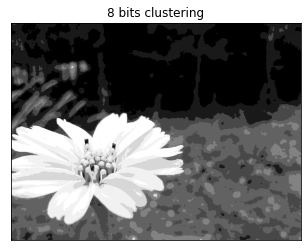

In [9]:
plt.figure()
plt.xticks([]),plt.yticks([])
plt.title("8 bits clustering")
plt.imshow(img_comp, cmap = cm.Greys_r) 
plt.show()

In [10]:
img_direct = np.copy(img_gray)

In [11]:
for i in range(img_direct.shape[0]):
    for j in range(img_direct.shape[1]):
        img_direct[i,j] = np.floor(img_gray[i,j]*8)/8

In [12]:
img_direct

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.125, 0.125, 0.125, ..., 0.25 , 0.25 , 0.25 ],
       [0.125, 0.   , 0.   , ..., 0.25 , 0.25 , 0.25 ],
       [0.   , 0.   , 0.   , ..., 0.25 , 0.25 , 0.25 ]], dtype=float32)

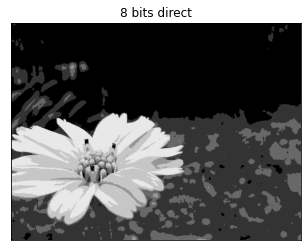

In [13]:
plt.figure()
plt.xticks([]),plt.yticks([])
plt.title("8 bits direct")
plt.imshow(img_direct, cmap = cm.Greys_r) 
plt.show()

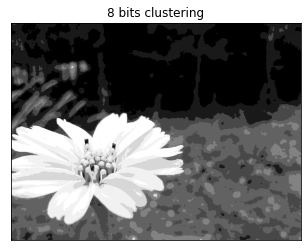

In [14]:
plt.figure()
plt.xticks([]),plt.yticks([])
plt.title("8 bits clustering")
plt.imshow(img_comp, cmap = cm.Greys_r) 
plt.show()